# Assigment 1 - INSY 695 - Michael Church Carson (260683849)

## Introduction to use case:
Body Mass Index (BMI) is a common indicator of an individual's body composition. For instance, it is commonly used to classify individuals as under or over weight. BMI is a function of weight and height, but it is also correlated with other health indicators, such as one's age or blood sugar level. Consequently, in this notebook, an end-to-end machine learning process will be used to predict an idividual's BMI based on their other health statistics. 

Predicting BMI is useful because it allows individaul's and healthcare providers to estmate how BMI will change when other factors are adjusted. For instance, a healthcare provider could increase a patient's age by 10 years to show them where their BMI is expected to be in the future, holding their other health statistics constant.


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Import the Data

In [2]:
#Import dataset with key health indicators (age, glocose level, etc.) on 5110 patients

import pandas as pd

health = pd.read_csv('healthcare_BMI.csv')

## Take a Quick Look at the Data Structure

In [3]:
health.head()

,id,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,77,Female,13.0,0,0,0,No,children,Rural,85.81,18.6,NaN
1,84,Male,55.0,0,0,0,Yes,Private,Urban,89.17,31.5,never smoked
2,91,Female,42.0,0,0,0,No,Private,Urban,98.53,18.5,never smoked
3,99,Female,31.0,0,0,0,No,Private,Urban,108.89,52.3,NaN
4,129,Female,24.0,0,0,0,No,Private,Urban,97.55,26.2,never smoked


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   stroke             4909 non-null   int64  
 6   ever_married       4909 non-null   object 
 7   work_type          4909 non-null   object 
 8   Residence_type     4909 non-null   object 
 9   avg_glucose_level  4909 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     3426 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [5]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   stroke             4909 non-null   int64  
 6   ever_married       4909 non-null   object 
 7   work_type          4909 non-null   object 
 8   Residence_type     4909 non-null   object 
 9   avg_glucose_level  4909 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     3426 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


## Dealing with missing categorical values

The smoking status variable has several missing values.

In [6]:
health['smoking_status'].isna().sum()

1483

There are 1483 missing values for the 'smoking_status' categorical value. One approach to deal with these variable is to change them to the most popular class for this categorical variable: 'never smoked'.

In [7]:
health['smoking_status'].value_counts()

never smoked       1852
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [8]:
(1852/4909)*100

37.72662456712161

<AxesSubplot:>

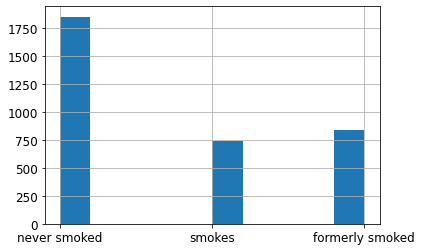

In [9]:
health['smoking_status'].hist()

The most frequent class is "never smoked", so let's try converting the missing values to "never smoked"

In [10]:
health['smoking_status'] = health['smoking_status'].replace(np.nan, 'never smoked')

In [11]:
health['smoking_status'].value_counts()

never smoked       3335
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [12]:
(3335/4909)*100

67.93644326746792

<AxesSubplot:>

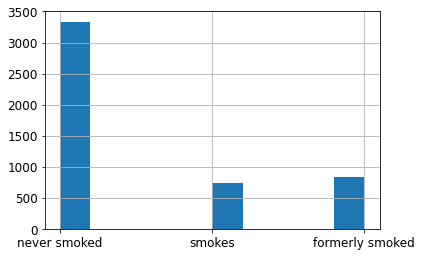

In [13]:
health['smoking_status'].hist()

This appraoch for handeling the missing values was successful, but it has significantly changed the distribution of the smoking status variable. The variable is now 68% 'never smoked', whereas before it was only 38% 'never smoked'. Consequently, a bettter approah is to change the missing values into a new category called "not_reported' so that we do not bias the data towards the 'never smoked' category.

In [14]:
#re-import the original dataset.

health = pd.read_csv('healthcare_BMI.csv')

In [15]:
health['smoking_status'] = health['smoking_status'].replace(np.nan, 'not_reported')

In [16]:
health['smoking_status'].value_counts()

never smoked       1852
not_reported       1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

<AxesSubplot:>

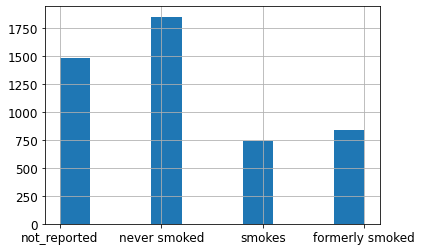

In [17]:
health['smoking_status'].hist()

As demonstrated by the above histogram, by making the new class "not_reported" we preserve the distribution of the three smoking classes and remove the missing values.

Next, we drop the 'id' column, which is an individual patient identifier, so that it is not misintrepred as a numberic value when performing ML tasks later. Indexes will be added to the dataframe below, so there will still be a way to identify observations.

In [18]:
health = health.drop(columns=['id'])

Average glucose level is not an easily interpretable statistic to a non-medical professional; however, it is an indication of whether or not an individual has diabetes. Therefore, to increase the interpretabilty of the data set we will engineer a new attribute using the 'avg_glucose_level' attribute called 'diabetes_status'.

In [19]:
# create a list of our conditions
conditions = [
    (health['avg_glucose_level'] >= 200),
    (health['avg_glucose_level'] > 140) & (health['avg_glucose_level'] <= 199),
    (health['avg_glucose_level'] <= 140)
    ]

# create a list of the values we want to assign for each condition
values = ['diabetic', 'pre-diabetic', 'non-diabetic']

# create a new column and use np.select to assign values to it using our lists as arguments
health['diabetes_status'] = np.select(conditions, values)

# display updated DataFrame
health.head()

,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabetes_status
0,Female,13.0,0,0,0,No,children,Rural,85.81,18.6,not_reported,non-diabetic
1,Male,55.0,0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,non-diabetic
2,Female,42.0,0,0,0,No,Private,Urban,98.53,18.5,never smoked,non-diabetic
3,Female,31.0,0,0,0,No,Private,Urban,108.89,52.3,not_reported,non-diabetic
4,Female,24.0,0,0,0,No,Private,Urban,97.55,26.2,never smoked,non-diabetic


In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(health)
#prof.to_file(output_file='health_profile_report.html')

## Merge low frequency observation:
As shown above, there is only one observation where gender is 'other', opposed to female or male. Due to the very low frequency of this 'other' value, it will act something like an outlier if we include it in the dataset. For instance, when we split the data into training and test, if it appears in the test set, it cannot appear in the training set, and our models will produce errors. To prevent us from encountering this issue later, we will tranform this single observation based on the distribution of the other variables. That is, we will change this observation to 'Female', since the majority of the observations are females, opposed to males. (Note: another approach would be to drop this obervation, but since it is only one observation the difference between dropping it or converting it to 'Female' is negligible)

In [21]:
health['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [22]:
health['gender'] = health['gender'].replace(['Other'],'Female')

In [23]:
health['gender'].value_counts()

Female    2898
Male      2011
Name: gender, dtype: int64

In [24]:
health["bmi"].value_counts()

28.7    41
28.4    38
26.1    37
27.7    37
26.7    37
        ..
58.1     1
49.9     1
13.3     1
13.4     1
61.6     1
Name: bmi, Length: 418, dtype: int64

In [25]:
health.describe()

,age,hypertension,heart_disease,stroke,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,0.042575,105.305150,28.893237
std,22.555115,0.288875,0.216934,0.201917,44.424341,7.854067
min,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,0.000000,77.070000,23.500000
50%,44.000000,0.000000,0.000000,0.000000,91.680000,28.100000
75%,60.000000,0.000000,0.000000,0.000000,113.570000,33.100000
max,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000


Saving figure attribute_histogram_plots


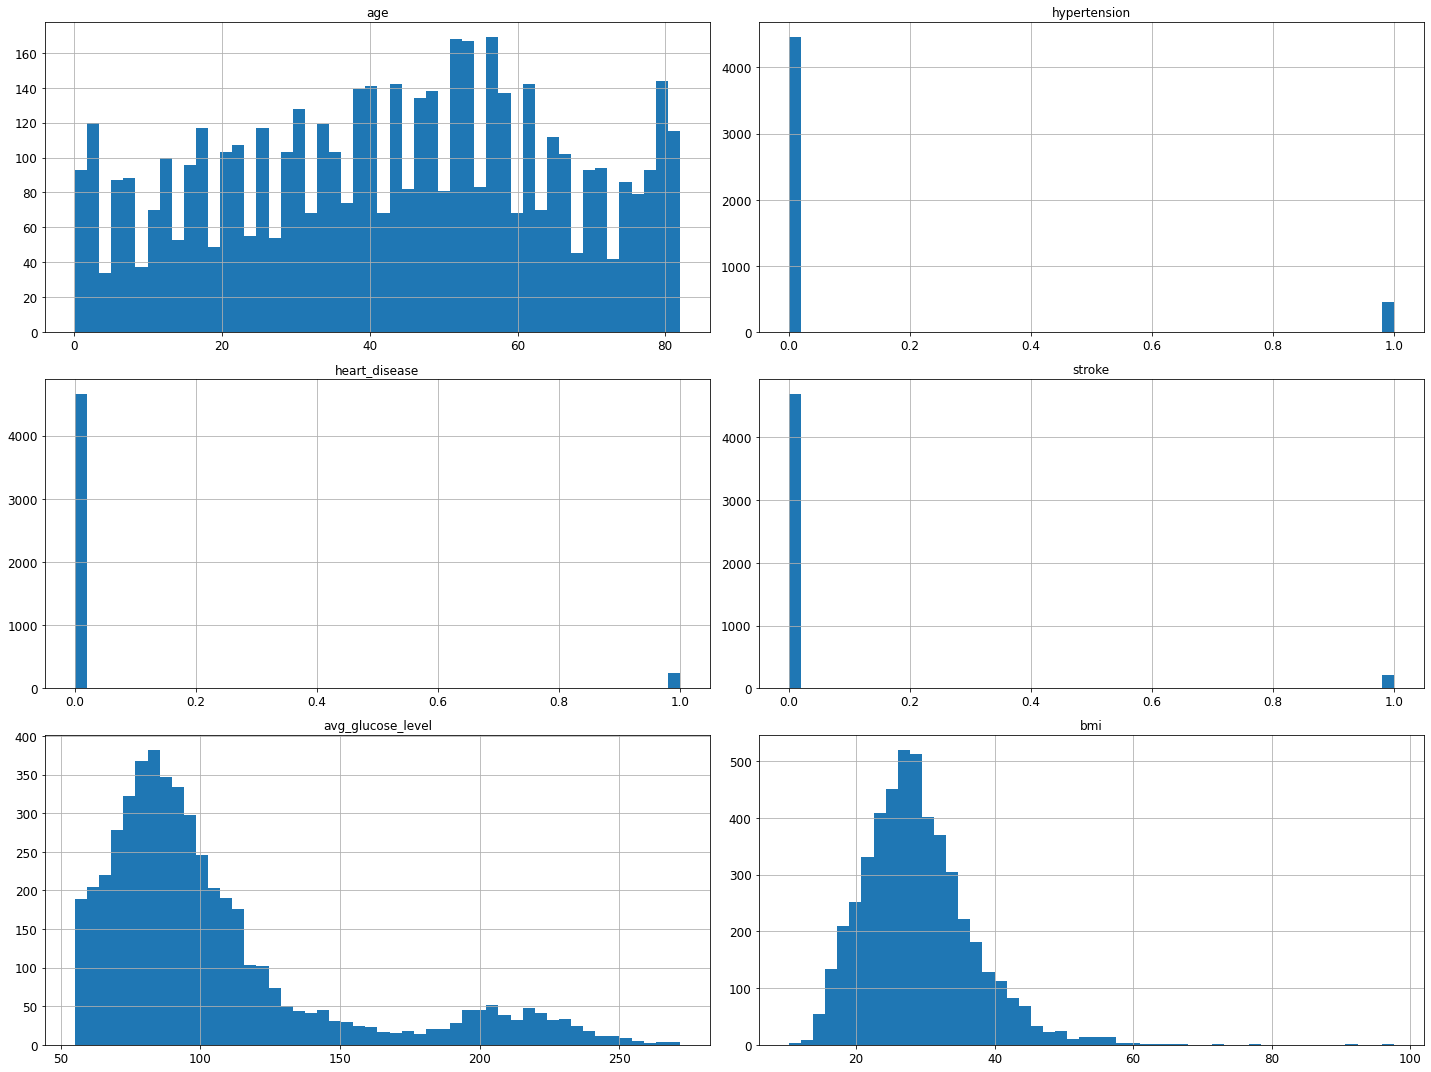

In [26]:
# histograms of numberical variables

%matplotlib inline
import matplotlib.pyplot as plt
health.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [27]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [28]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = split_train_test(health, 0.2)
len(train_set)

3928

In [30]:
len(test_set)

981

In [31]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [32]:
health_with_id = health.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(health_with_id, 0.2, "index")

In [33]:
test_set.head()

,index,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabetes_status
2,2,Female,42.0,0,0,0,No,Private,Urban,98.53,18.5,never smoked,non-diabetic
5,5,Female,33.0,0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,non-diabetic
12,12,Male,31.0,0,0,0,No,Private,Urban,72.60,31.6,never smoked,non-diabetic
16,16,Female,43.0,0,0,0,Yes,Private,Rural,110.32,28.4,never smoked,non-diabetic
23,23,Female,37.0,0,0,0,Yes,Govt_job,Urban,72.09,24.1,smokes,non-diabetic


In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

In [35]:
test_set.head()

,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabetes_status
4153,Male,34.00,0,0,0,Yes,Private,Urban,61.11,29.3,never smoked,non-diabetic
3543,Female,25.00,0,0,0,No,Private,Rural,67.73,22.6,never smoked,non-diabetic
907,Male,43.00,0,0,0,Yes,Govt_job,Rural,88.00,30.6,never smoked,non-diabetic
2522,Female,65.00,0,0,0,No,Self-employed,Rural,86.33,33.1,never smoked,non-diabetic
3107,Female,0.08,0,0,0,No,children,Urban,139.67,14.1,not_reported,non-diabetic


<AxesSubplot:>

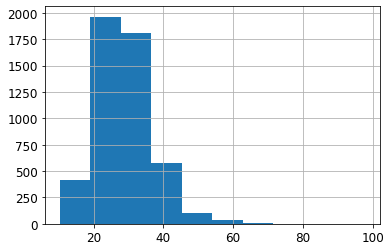

In [36]:
# histogram of target variable - Body Mass Index (BMI)
health["bmi"].hist()

In [37]:
health['work_type'].describe()

count        4909
unique          5
top       Private
freq         2811
Name: work_type, dtype: object

## Exploring work type

<AxesSubplot:>

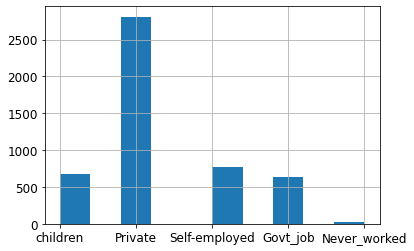

In [38]:
health["work_type"].hist()

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["work_type"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

In [40]:
strat_test_set["work_type"].value_counts() / len(strat_test_set)

Private          0.572301
Self-employed    0.157841
children         0.136456
Govt_job         0.128310
Never_worked     0.005092
Name: work_type, dtype: float64

In [41]:
health["work_type"].value_counts() / len(health)

Private          0.572622
Self-employed    0.157873
children         0.136688
Govt_job         0.128336
Never_worked     0.004482
Name: work_type, dtype: float64

In [42]:
def work_type_proportions(data):
    return data["work_type"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": work_type_proportions(health),
    "Stratified": work_type_proportions(strat_test_set),
    "Random": work_type_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [43]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Govt_job,0.128336,0.128310,0.146640,14.262438,-0.020367
Never_worked,0.004482,0.005092,0.003055,-31.832068,13.613220
Private,0.572622,0.572301,0.529532,-7.525063,-0.055934
Self-employed,0.157873,0.157841,0.170061,7.719992,-0.020367
children,0.136688,0.136456,0.150713,10.260699,-0.169368


## Exploring residence type

<AxesSubplot:>

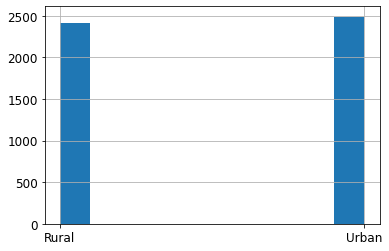

In [44]:
health["Residence_type"].hist()

In [45]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["Residence_type"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

In [46]:
strat_test_set["Residence_type"].value_counts() / len(strat_test_set)

Urban    0.507128
Rural    0.492872
Name: Residence_type, dtype: float64

In [47]:
health["Residence_type"].value_counts() / len(health)

Urban    0.507232
Rural    0.492768
Name: Residence_type, dtype: float64

In [48]:
def residence_type_proportions(data):
    return data["Residence_type"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": residence_type_proportions(health),
    "Stratified": residence_type_proportions(strat_test_set),
    "Random": residence_type_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [49]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Rural,0.492768,0.492872,0.488798,-0.805655,0.020964
Urban,0.507232,0.507128,0.511202,0.782683,-0.020367


## Exploring marital status

<AxesSubplot:>

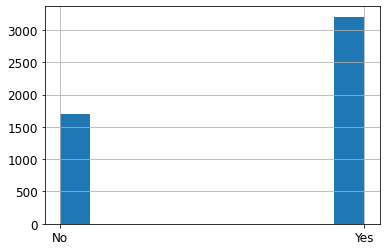

In [50]:
health["ever_married"].hist()

In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["ever_married"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

In [52]:
strat_test_set["ever_married"].value_counts() / len(strat_test_set)

Yes    0.652749
No     0.347251
Name: ever_married, dtype: float64

In [53]:
health["ever_married"].value_counts() / len(health)

Yes    0.652679
No     0.347321
Name: ever_married, dtype: float64

In [54]:
def ever_married_proportions(data):
    return data["ever_married"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": ever_married_proportions(health),
    "Stratified": ever_married_proportions(strat_test_set),
    "Random": ever_married_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [55]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
No,0.347321,0.347251,0.366599,5.550346,-0.020367
Yes,0.652679,0.652749,0.633401,-2.953602,0.010838


## Exploring Smoking status

,Overall,Stratified,Random,Rand. %error,Strat. %error
formerly smoked,0.170503,0.170061,0.170061,-0.259267,-0.259267
never smoked,0.377266,0.377800,0.363544,-3.637340,0.141587
not_reported,0.302098,0.302444,0.318737,5.507840,0.114468
smokes,0.150132,0.149695,0.147658,-1.648258,-0.291682


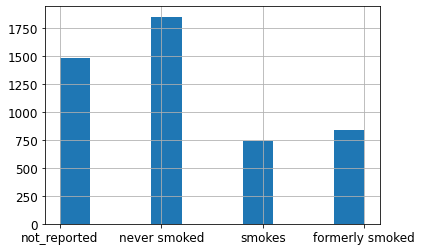

In [56]:
health["smoking_status"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["smoking_status"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

strat_test_set["smoking_status"].value_counts() / len(strat_test_set)

health["smoking_status"].value_counts() / len(health)

def smoking_status_proportions(data):
    return data["smoking_status"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": smoking_status_proportions(health),
    "Stratified": smoking_status_proportions(strat_test_set),
    "Random": smoking_status_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

## Exploring Stroke history

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.957425,0.95723,0.958248,0.085995,-0.020367
1,0.042575,0.04277,0.041752,-1.933852,0.458005


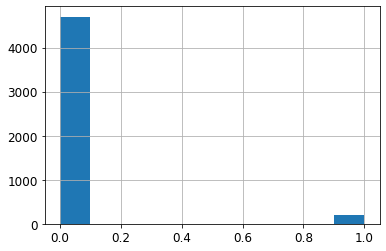

In [57]:
health["stroke"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["stroke"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

strat_test_set["stroke"].value_counts() / len(strat_test_set)

health["stroke"].value_counts() / len(health)

def stroke_proportions(data):
    return data["stroke"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": stroke_proportions(health),
    "Stratified": stroke_proportions(strat_test_set),
    "Random": stroke_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

## Exploring hypertension history

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.908128,0.90835,0.904277,-0.424053,0.024487
1,0.091872,0.09165,0.095723,4.191636,-0.242051


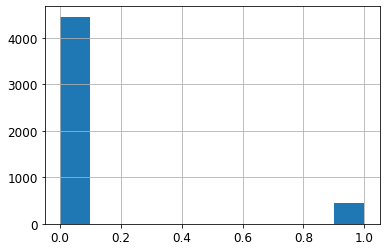

In [58]:
health["hypertension"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["hypertension"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

strat_test_set["hypertension"].value_counts() / len(strat_test_set)

health["hypertension"].value_counts() / len(health)

def hypertension_proportions(data):
    return data["hypertension"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": hypertension_proportions(health),
    "Stratified": hypertension_proportions(strat_test_set),
    "Random": hypertension_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

## Exploring heart disease history

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.950499,0.950102,0.94501,-0.577476,-0.041794
1,0.049501,0.049898,0.05499,11.088482,0.802511


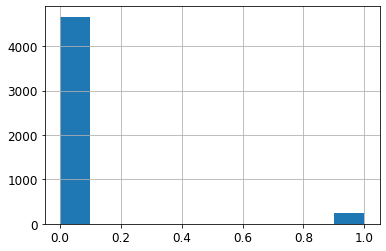

In [59]:
health["heart_disease"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(health, health["heart_disease"]):
    strat_train_set = health.loc[train_index]
    strat_test_set = health.loc[test_index]

strat_test_set["heart_disease"].value_counts() / len(strat_test_set)

health["heart_disease"].value_counts() / len(health)

def heart_disease_proportions(data):
    return data["heart_disease"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": heart_disease_proportions(health),
    "Stratified": heart_disease_proportions(strat_test_set),
    "Random": heart_disease_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

## Exploring gender

,Overall,Stratified,Random,Rand. %error,Strat. %error
Female,0.590344,0.612016,0.560081,-5.126297,3.671083
Male,0.409656,0.387984,0.439919,7.387374,-5.290303


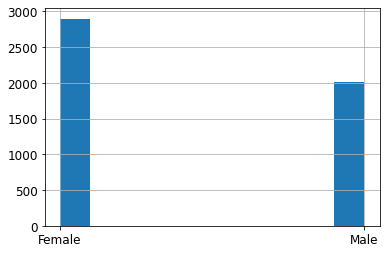

In [60]:
health["gender"].hist()

strat_test_set["gender"].value_counts() / len(strat_test_set)

health["gender"].value_counts() / len(health)

def gender_proportions(data):
    return data["gender"].value_counts() / len(data)

train_set, test_set = train_test_split(health, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": gender_proportions(health),
    "Stratified": gender_proportions(strat_test_set),
    "Random": gender_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

# Discover and Visualize the Data to Gain Insights

In [61]:
health = strat_train_set.copy()

## Visualizing Geographical Data

Saving figure bad_visualization_plot


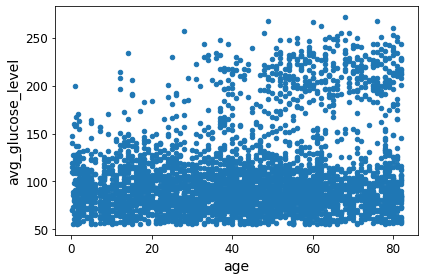

In [62]:
health.plot(kind="scatter", x="age", y="avg_glucose_level")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


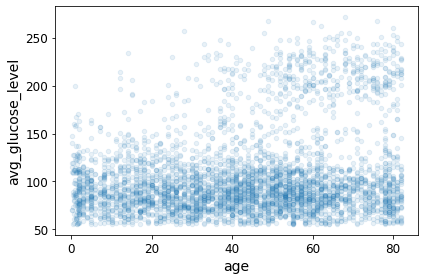

In [63]:
health.plot(kind="scatter", x="age", y="avg_glucose_level", alpha=0.1)
save_fig("better_visualization_plot")

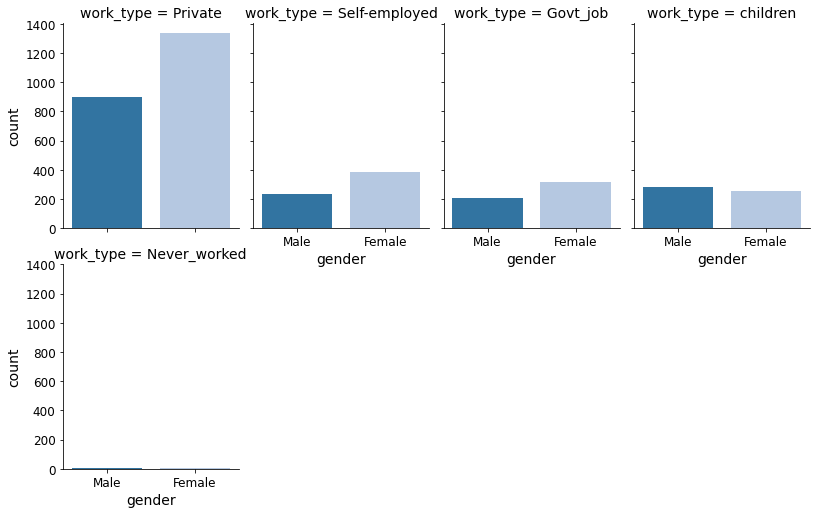

In [64]:
import seaborn as sns

# Plot
work_type_by_gender = sns.catplot(x="gender", col="work_type", col_wrap=4,
                        data=health[health.work_type.notnull()],
                        kind="count", height=3.5, aspect=.8, 
                        palette='tab20')


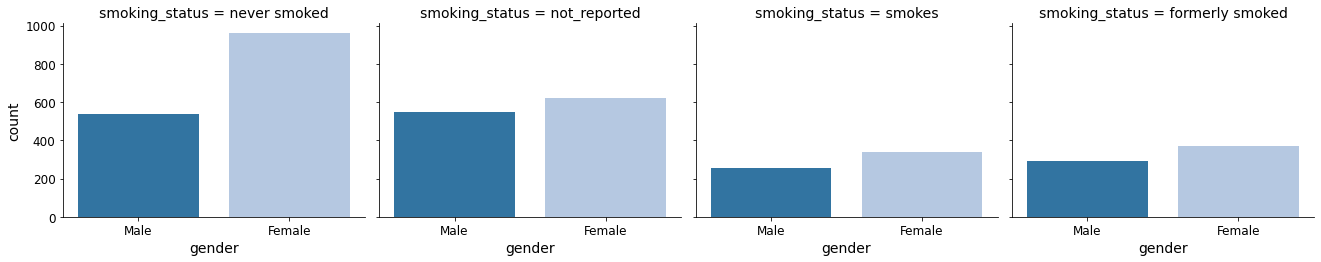

In [65]:
# Plot
gender_by_smoking_status = sns.catplot(x = "gender", col="smoking_status", col_wrap=4,
                            data=health[health.work_type.notnull()],
                            kind="count", height=3.5, aspect=1.3, 
                            palette='tab20')

## Looking for Correlations

In [66]:
corr_matrix = health.corr()

In [67]:
corr_matrix["bmi"].sort_values(ascending=False)

bmi                  1.000000
age                  0.341470
avg_glucose_level    0.171050
hypertension         0.161317
heart_disease        0.048625
stroke               0.032917
Name: bmi, dtype: float64

In [68]:
corr_matrix

,age,hypertension,heart_disease,stroke,avg_glucose_level,bmi
age,1.000000,0.269053,0.250793,0.230001,0.221528,0.341470
hypertension,0.269053,1.000000,0.124274,0.127869,0.179614,0.161317
heart_disease,0.250793,0.124274,1.000000,0.150672,0.147578,0.048625
stroke,0.230001,0.127869,0.150672,1.000000,0.127470,0.032917
avg_glucose_level,0.221528,0.179614,0.147578,0.127470,1.000000,0.171050
bmi,0.341470,0.161317,0.048625,0.032917,0.171050,1.000000


<AxesSubplot:>

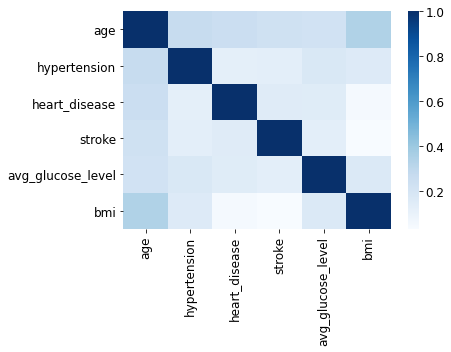

In [69]:
sns.heatmap(corr_matrix, cmap = 'Blues')

Saving figure scatter_matrix_plot


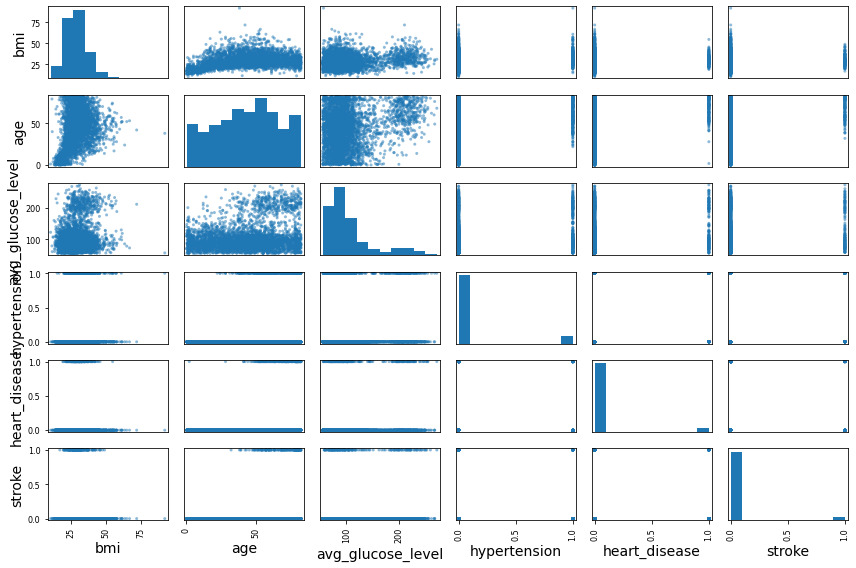

In [70]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["bmi", "age", "avg_glucose_level",
              "hypertension", "heart_disease", "stroke"]
scatter_matrix(health[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure bmi_vs_age_scatterplot


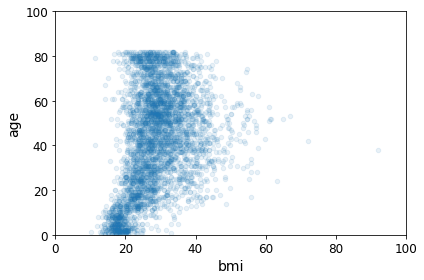

In [71]:
health.plot(kind="scatter", x="bmi", y="age",
             alpha=0.1)
plt.axis([0, 100, 0, 100])
save_fig("bmi_vs_age_scatterplot")

## Experimenting with Attribute Combinations

In [72]:
health["heart_disease_and_stroke"] = health["heart_disease"]*health["stroke"]
health["heart_disease_and_hypertension"] = health["heart_disease"]*health["hypertension"]
health["hypertension_and_stroke"] = health["hypertension"]*health["stroke"]

In [73]:
corr_matrix = health.corr()
corr_matrix["bmi"].sort_values(ascending=False)

bmi                               1.000000
age                               0.341470
avg_glucose_level                 0.171050
hypertension                      0.161317
heart_disease                     0.048625
heart_disease_and_hypertension    0.041354
hypertension_and_stroke           0.036439
stroke                            0.032917
heart_disease_and_stroke          0.022042
Name: bmi, dtype: float64

In [74]:
# Drop the three attributes we added by combining existing attributes because we will add them in later in script
# using the custom transformer function:

health = health.drop(columns=['heart_disease_and_stroke', 'heart_disease_and_hypertension', 'hypertension_and_stroke'])

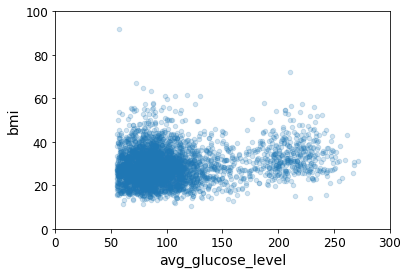

In [75]:
health.plot(kind="scatter", x="avg_glucose_level", y="bmi",
             alpha=0.2)
plt.axis([0, 300, 0, 100])
plt.show()

In [76]:
health.describe()

,age,hypertension,heart_disease,stroke,avg_glucose_level,bmi
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000
mean,43.058253,0.093710,0.049402,0.042271,105.104757,28.899873
std,22.576167,0.291462,0.216733,0.201233,43.869269,7.795270
min,0.080000,0.000000,0.000000,0.000000,55.220000,10.300000
25%,25.000000,0.000000,0.000000,0.000000,77.050000,23.500000
50%,45.000000,0.000000,0.000000,0.000000,91.850000,28.100000
75%,60.500000,0.000000,0.000000,0.000000,113.090000,33.200000
max,82.000000,1.000000,1.000000,1.000000,271.740000,92.000000


# Prepare the Data for Machine Learning Algorithms

In [77]:
health = strat_train_set.drop("bmi", axis=1) # drop labels for training set
health_labels = strat_train_set["bmi"].copy()

## Data Cleaning

There are no missing numerical values in the dataset. The cell below demonstrates that there are no rows with missing values.

In [78]:
sample_incomplete_rows = health[health.isnull().any(axis=1)].head()
sample_incomplete_rows

,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,diabetes_status


There are no missing numerical values in this dataset, but this is a very rare phenomenon. Usually, a dataset contains some missing numerical values. Conequently, in the following cells we will demonstrate how imputation could be used to replace missing values, were there any. Additionally, the imputation process will be included in the pipeline used to prepare the data for modelling so that if data were added to this dataset in the future that contained missing numerical values, the pipeline is already set up to handle this.


#median = health["col_name"].median()
#sample_incomplete_rows["col_name"].fillna(median, inplace=True) # option 3

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [80]:
health_num = health.select_dtypes(include=[np.number])

In [81]:
imputer.fit(health_num)

SimpleImputer(strategy='median')

In [82]:
imputer.statistics_

array([45.  ,  0.  ,  0.  ,  0.  , 91.85])

Check that this is the same as manually computing the median of each attribute:

In [83]:
health_num.median().values

array([45.  ,  0.  ,  0.  ,  0.  , 91.85])

Transform the training set:

In [84]:
X = imputer.transform(health_num)

In [85]:
health_tr = pd.DataFrame(X, columns=health_num.columns,
                          index=health.index)

In [86]:
health_tr.loc[sample_incomplete_rows.index.values]

,age,hypertension,heart_disease,stroke,avg_glucose_level


In [87]:
imputer.strategy

'median'

In [88]:
health_tr = pd.DataFrame(X, columns=health_num.columns,
                          index=health_num.index)

In [89]:
health_tr.head()

,age,hypertension,heart_disease,stroke,avg_glucose_level
3759,47.0,0.0,0.0,0.0,111.15
1076,36.0,0.0,0.0,0.0,77.92
3120,55.0,1.0,0.0,0.0,186.40
235,22.0,0.0,0.0,0.0,89.06
277,63.0,0.0,0.0,0.0,83.74


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `gender, ever_married, work_type, Residence_type, smoking_status and diabetes_status`:

In [90]:
health_cat = health[["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "diabetes_status"]]
health_cat.head(10)

,gender,ever_married,work_type,Residence_type,smoking_status,diabetes_status
3759,Male,No,Private,Rural,never smoked,non-diabetic
1076,Female,Yes,Self-employed,Urban,not_reported,non-diabetic
3120,Female,Yes,Govt_job,Urban,never smoked,pre-diabetic
235,Female,Yes,Private,Urban,never smoked,non-diabetic
277,Female,Yes,Private,Urban,not_reported,non-diabetic
3936,Female,Yes,Self-employed,Rural,never smoked,non-diabetic
3685,Male,Yes,Private,Rural,smokes,non-diabetic
3255,Male,No,children,Rural,not_reported,non-diabetic
1609,Male,No,Private,Rural,smokes,non-diabetic
4683,Female,Yes,Private,Rural,never smoked,non-diabetic


In [91]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
health_cat_encoded = ordinal_encoder.fit_transform(health_cat)
health_cat_encoded[:10]

array([[1., 0., 2., 0., 1., 2.],
       [0., 1., 3., 1., 2., 2.],
       [0., 1., 0., 1., 1., 3.],
       [0., 1., 2., 1., 1., 2.],
       [0., 1., 2., 1., 2., 2.],
       [0., 1., 3., 0., 1., 2.],
       [1., 1., 2., 0., 3., 2.],
       [1., 0., 4., 0., 2., 2.],
       [1., 0., 2., 0., 3., 2.],
       [0., 1., 2., 0., 1., 2.]])

In [92]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['formerly smoked', 'never smoked', 'not_reported', 'smokes'],
       dtype=object),
 array(['0', 'diabetic', 'non-diabetic', 'pre-diabetic'], dtype=object)]

In [93]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
health_cat_1hot = cat_encoder.fit_transform(health_cat)
health_cat_1hot

array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [94]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['formerly smoked', 'never smoked', 'not_reported', 'smokes'],
       dtype=object),
 array(['0', 'diabetic', 'non-diabetic', 'pre-diabetic'], dtype=object)]

## Custom Transformers

Let's create a custom transformer to add extra attributes:

In [95]:
col_names = "hypertension", "heart_disease", "stroke"
hypertension_ix, heart_disease_ix, stroke_ix = [
    health.columns.get_loc(c) for c in col_names] # get the column indices

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_heart_disease_and_stroke=True): # no *args or **kargs
        self.add_heart_disease_and_stroke = add_heart_disease_and_stroke
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        heart_disease_and_hypertension = X[:, heart_disease_ix] * X[:, hypertension_ix]
        hypertension_and_stroke = X[:, hypertension_ix] * X[:, stroke_ix]
        if self.add_heart_disease_and_stroke:
            heart_disease_and_stroke = X[:, heart_disease_ix] * X[:, stroke_ix]
            return np.c_[X, heart_disease_and_stroke, heart_disease_and_hypertension,
                         hypertension_and_stroke]
        else:
            return np.c_[X, heart_disease_and_hypertension, hypertension_and_stroke]

attr_adder = CombinedAttributesAdder(add_heart_disease_and_stroke=True)
health_extra_attribs = attr_adder.transform(health.values)

In [97]:
len(health_extra_attribs[0])

14

Also, `health_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you can run this:

In [98]:
health_extra_attribs = pd.DataFrame(
    health_extra_attribs,
    columns=list(health.columns)+["heart_disease_and_stroke","heart_disease_and_hypertension","hypertension_and_stroke"],
    index=health.index)
health_extra_attribs.head()

,gender,age,hypertension,heart_disease,stroke,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,diabetes_status,heart_disease_and_stroke,heart_disease_and_hypertension,hypertension_and_stroke
3759,Male,47.0,0,0,0,No,Private,Rural,111.15,never smoked,non-diabetic,0,0,0
1076,Female,36.0,0,0,0,Yes,Self-employed,Urban,77.92,not_reported,non-diabetic,0,0,0
3120,Female,55.0,1,0,0,Yes,Govt_job,Urban,186.4,never smoked,pre-diabetic,0,0,0
235,Female,22.0,0,0,0,Yes,Private,Urban,89.06,never smoked,non-diabetic,0,0,0
277,Female,63.0,0,0,0,Yes,Private,Urban,83.74,not_reported,non-diabetic,0,0,0


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

health_num_tr = num_pipeline.fit_transform(health_num)

In [100]:
health_num_tr

array([[ 0.17461993, -0.32155844, -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556],
       [-0.31268159, -0.32155844, -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556],
       [ 0.52902104,  3.1098546 , -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556],
       ...,
       [ 1.59222437, -0.32155844, -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556],
       [-0.17978118, -0.32155844, -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556],
       [-0.17978118, -0.32155844, -0.22796694, ..., -0.18968375,
        -0.09345386, -0.20621556]])

In [101]:
from sklearn.compose import ColumnTransformer

num_attribs = list(health_num)
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "diabetes_status"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

health_prepared = full_pipeline.fit_transform(health)

In [102]:
health_prepared

array([[ 0.17461993, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31268159, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52902104,  3.1098546 , -0.22796694, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.59222437, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17978118, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17978118, -0.32155844, -0.22796694, ...,  0.        ,
         0.        ,  1.        ]])

In [103]:
health_prepared.shape

(3927, 27)

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [105]:
num_attribs = list(health_num)
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "diabetes_status"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [106]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [107]:
old_health_prepared = old_full_pipeline.fit_transform(health)
old_health_prepared

array([[ 0.17461993, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31268159, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52902104,  3.1098546 , -0.22796694, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.59222437, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17978118, -0.32155844, -0.22796694, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17978118, -0.32155844, -0.22796694, ...,  0.        ,
         0.        ,  1.        ]])

The result is the same as with the `ColumnTransformer`:

In [108]:
np.allclose(health_prepared, old_health_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(health_prepared, health_labels)

LinearRegression()

In [110]:
# let's try the full preprocessing pipeline on a few training instances
some_data = health.iloc[:5]
some_labels = health_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [28.37295194 29.5279221  33.58951957 30.90703545 29.69098418]


Compare against the actual values:

In [111]:
print("Labels:", list(some_labels))

Labels: [23.8, 24.9, 28.0, 27.7, 21.4]


In [112]:
some_data_prepared

array([[ 0.17461993, -0.32155844, -0.22796694, -0.21008855,  0.13781887,
        -0.18968375, -0.09345386, -0.20621556,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.31268159, -0.32155844, -0.22796694, -0.21008855, -0.61975545,
        -0.18968375, -0.09345386, -0.20621556,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.52902104,  3.1098546 , -0.22796694, -0.21008855,  1.85336107,
        -0.18968375, -0.09345386, -0.20621556,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.    

In [113]:
from sklearn.metrics import mean_squared_error

health_predictions = lin_reg.predict(health_prepared)
lin_mse = mean_squared_error(health_labels, health_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.745426791774369

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [114]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(health_labels, health_predictions)
lin_mae

5.060925746366932

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(health_prepared, health_labels)

DecisionTreeRegressor(random_state=42)

In [116]:
health_predictions = tree_reg.predict(health_prepared)
tree_mse = mean_squared_error(health_labels, health_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, health_prepared, health_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [118]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 9.01264167  9.34045348  9.55026344  9.86214522  9.62985181  9.49585687
  9.36982597  8.98087537  9.82187791 10.53011837]
Mean: 9.559391011673558
Standard deviation: 0.4277194690562182


In [119]:
lin_scores = cross_val_score(lin_reg, health_prepared, health_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.67917405 6.68982145 6.80667629 6.95415924 6.98930055 6.22438828
 6.3231313  6.55808225 7.17204497 7.33146453]
Mean: 6.772824289902895
Standard deviation: 0.3342343752962058


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [120]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(health_prepared, health_labels)

RandomForestRegressor(random_state=42)

In [121]:
health_predictions = forest_reg.predict(health_prepared)
forest_mse = mean_squared_error(health_labels, health_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.632055245745031

In [122]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, health_prepared, health_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [7.09835177 6.76739491 6.99393458 7.18295815 7.05248459 6.59575149
 6.91125329 6.79970356 7.31780071 7.32593177]
Mean: 7.004556481625907
Standard deviation: 0.22770067907841243


In [123]:
scores = cross_val_score(lin_reg, health_prepared, health_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      6.772824
std       0.352314
min       6.224388
25%       6.588355
50%       6.748249
75%       6.980515
max       7.331465
dtype: float64

In [124]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(health_prepared, health_labels)
health_predictions = svm_reg.predict(health_prepared)
svm_mse = mean_squared_error(health_labels, health_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

6.869375510185666

# Fine-Tune Your Model

## Grid Search

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(health_prepared, health_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [126]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [127]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [128]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.036879942308463 {'max_features': 2, 'n_estimators': 3}
7.380322609980529 {'max_features': 2, 'n_estimators': 10}
7.195069151253345 {'max_features': 2, 'n_estimators': 30}
7.8396036694064275 {'max_features': 4, 'n_estimators': 3}
7.232373998165553 {'max_features': 4, 'n_estimators': 10}
7.111276023822144 {'max_features': 4, 'n_estimators': 30}
7.891209745384485 {'max_features': 6, 'n_estimators': 3}
7.227347775893907 {'max_features': 6, 'n_estimators': 10}
7.0446276316013625 {'max_features': 6, 'n_estimators': 30}
7.928115619044917 {'max_features': 8, 'n_estimators': 3}
7.2212900591454225 {'max_features': 8, 'n_estimators': 10}
7.0334691283964625 {'max_features': 8, 'n_estimators': 30}
8.299236440425966 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.718645302326252 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
8.261505391773339 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.69635277707174 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [129]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020750,0.005518,0.002141,0.000514,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-63.637022,-61.925325,...,-64.591439,4.938621,16,-16.112197,-1.573969e+01,-15.683269,-14.991755,-1.456658e+01,-15.418697,0.558992
1,0.053223,0.001393,0.004286,0.001369,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-53.934256,-53.931616,...,-54.469162,4.250817,8,-9.582158,-9.436900e+00,-9.642764,-9.323335,-8.900726e+00,-9.377177,0.263069
2,0.123368,0.004789,0.008366,0.000575,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-50.291765,-51.350730,...,-51.769020,4.367150,4,-8.184792,-8.121551e+00,-7.932202,-7.732169,-7.471536e+00,-7.888450,0.261653
3,0.015081,0.000730,0.001639,0.000054,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-61.599405,-64.676193,...,-61.459386,4.788523,12,-15.605128,-1.526859e+01,-14.994499,-15.234713,-1.384313e+01,-14.989212,0.605178
4,0.053479,0.003800,0.004054,0.000423,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-51.836808,-53.130618,...,-52.307234,3.729391,7,-9.384528,-9.341680e+00,-9.346586,-9.115358,-8.569308e+00,-9.151492,0.306197
5,0.159801,0.005287,0.010555,0.001556,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-49.801152,-50.618008,...,-50.570247,4.014606,3,-8.035242,-7.922867e+00,-7.851383,-7.715690,-7.196294e+00,-7.744295,0.292960
6,0.019077,0.000983,0.002482,0.001065,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-59.409771,-59.638982,...,-62.271191,5.014532,13,-15.800679,-1.529293e+01,-15.109767,-15.005266,-1.402079e+01,-15.045887,0.580911
7,0.059728,0.004649,0.003798,0.000434,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-50.399421,-50.550370,...,-52.234556,4.145782,6,-9.433408,-9.171720e+00,-9.295552,-9.146613,-8.721510e+00,-9.153761,0.238965
8,0.161960,0.014390,0.009469,0.001635,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-47.598759,-49.507589,...,-49.626778,3.942805,2,-7.900144,-7.737399e+00,-7.749293,-7.552211,-7.079237e+00,-7.603657,0.284487
9,0.018242,0.000464,0.001617,0.000041,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-62.840205,-62.310348,...,-62.855017,1.807688,14,-15.674019,-1.575001e+01,-15.499068,-15.552530,-1.472422e+01,-15.439969,0.368609


## Randomized Search

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(health_prepared, health_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdcb40d49a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdcb40ab1c0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [131]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.965891328813631 {'max_features': 7, 'n_estimators': 180}
7.162918695378983 {'max_features': 5, 'n_estimators': 15}
7.069838770612359 {'max_features': 3, 'n_estimators': 72}
7.118418447309243 {'max_features': 5, 'n_estimators': 21}
6.976206359586452 {'max_features': 7, 'n_estimators': 122}
7.070510855378248 {'max_features': 3, 'n_estimators': 75}
7.0729721306841755 {'max_features': 3, 'n_estimators': 88}
7.007308665371197 {'max_features': 5, 'n_estimators': 100}
7.072843401131487 {'max_features': 3, 'n_estimators': 150}
8.272716235184085 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [132]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.33296851, 0.0159857 , 0.0037552 , 0.00318823, 0.33015611,
       0.00741696, 0.00053154, 0.00830643, 0.01507546, 0.01471534,
       0.0329106 , 0.0227703 , 0.01222971, 0.0013496 , 0.01696697,
       0.00899822, 0.05369521, 0.01460481, 0.01696911, 0.01279667,
       0.01749202, 0.02687997, 0.01190218, 0.00034179, 0.00880342,
       0.00490428, 0.00428566])

In [133]:
extra_attribs = ["heart_disease_and_stroke","heart_disease_and_hypertension","hypertension_and_stroke"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33296851309425085, 'age'),
 (0.33015611239301973, 'avg_glucose_level'),
 (0.01598569676467416, 'hypertension'),
 (0.015075456895536724, 'Female'),
 (0.01471533658782216, 'Male'),
 (0.008306434795963357, 'hypertension_and_stroke'),
 (0.00741696286908687, 'heart_disease_and_stroke'),
 (0.003755197562063766, 'heart_disease'),
 (0.003188230081870429, 'stroke'),
 (0.0005315438066660933, 'heart_disease_and_hypertension')]

## Evaluate Your System on the Test Set

In [134]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("bmi", axis=1)
y_test = strat_test_set["bmi"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [135]:
final_rmse

7.544924100425049

We can compute a 95% confidence interval for the test RMSE:

In [136]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([6.68524847, 8.31620179])

We could compute the interval manually like this:

In [137]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(6.685248472602038, 8.316201790596574)

Alternatively, we could use a z-scores rather than t-scores:

In [138]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(6.686377224650575, 8.315294280542549)

# Extra material

## A full pipeline with both preparation and prediction

In [139]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(health, health_labels)
full_pipeline_with_predictor.predict(some_data)

array([28.37295194, 29.5279221 , 33.58951957, 30.90703545, 29.69098418])

## Model persistence using joblib

In [140]:
my_model = full_pipeline_with_predictor

In [141]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

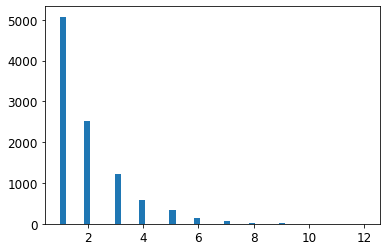

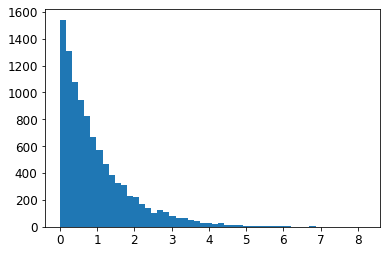

In [142]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## END

## By Michael Church Carson (260683849)